# Sales Analysis

### Import Necessary Libraries

In [34]:
import pandas as  pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Task #1: Merging 12 months of Sales data into a single file

In [7]:
df = pd.read_csv("./Sales_data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [8]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182073,Google Phone,1,600,04/30/19 10:35,"608 Hill St, New York City, NY 10001"
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215"
2,182075,iPhone,1,700,04/13/19 18:55,"669 12th St, Seattle, WA 98101"
3,182076,Google Phone,1,600,04/12/19 19:02,"939 Highland St, Austin, TX 73301"
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016"


### Clean up the Data!

#### _Drop rows of NaN values_

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
781,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
1393,NaN,NaN,NaN,NaN,NaN,NaN
1477,NaN,NaN,NaN,NaN,NaN,NaN
1750,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182073,Google Phone,1,600,04/30/19 10:35,"608 Hill St, New York City, NY 10001"
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215"
2,182075,iPhone,1,700,04/13/19 18:55,"669 12th St, Seattle, WA 98101"
3,182076,Google Phone,1,600,04/12/19 19:02,"939 Highland St, Austin, TX 73301"
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016"


### _Find 'Or' and delete it_

In [11]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3255,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3724,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4520,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
temp_df = all_data[all_data['Order Date'].str[0:2] != 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182073,Google Phone,1,600,04/30/19 10:35,"608 Hill St, New York City, NY 10001"
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215"
2,182075,iPhone,1,700,04/13/19 18:55,"669 12th St, Seattle, WA 98101"
3,182076,Google Phone,1,600,04/12/19 19:02,"939 Highland St, Austin, TX 73301"
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016"


In [13]:
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']

#### _Convert Columns to the correct type_

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# Make int 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# Make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,182073,Google Phone,1,600.00,04/30/19 10:35,"608 Hill St, New York City, NY 10001"
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215"
2,182075,iPhone,1,700.00,04/13/19 18:55,"669 12th St, Seattle, WA 98101"
3,182076,Google Phone,1,600.00,04/12/19 19:02,"939 Highland St, Austin, TX 73301"
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016"


### Augment data with additional columns

### Task 2: Add Month Column

In [15]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,182073,Google Phone,1,600.00,04/30/19 10:35,"608 Hill St, New York City, NY 10001",4
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215",4
2,182075,iPhone,1,700.00,04/13/19 18:55,"669 12th St, Seattle, WA 98101",4
3,182076,Google Phone,1,600.00,04/12/19 19:02,"939 Highland St, Austin, TX 73301",4
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016",4


### Task 3: Add a Sales Column

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,182073,Google Phone,1,600.00,04/30/19 10:35,"608 Hill St, New York City, NY 10001",4,600.00
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215",4,3.84
2,182075,iPhone,1,700.00,04/13/19 18:55,"669 12th St, Seattle, WA 98101",4,700.00
3,182076,Google Phone,1,600.00,04/12/19 19:02,"939 Highland St, Austin, TX 73301",4,600.00
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016",4,11.95


### Task 4: Add a city column

In [17]:
# Let's use the .apply():
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,182073,Google Phone,1,600.00,04/30/19 10:35,"608 Hill St, New York City, NY 10001",4,600.00,New York City (NY)
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215",4,3.84,Boston (MA)
2,182075,iPhone,1,700.00,04/13/19 18:55,"669 12th St, Seattle, WA 98101",4,700.00,Seattle (WA)
3,182076,Google Phone,1,600.00,04/12/19 19:02,"939 Highland St, Austin, TX 73301",4,600.00,Austin (TX)
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016",4,11.95,San Francisco (CA)


### Question 1:  _What was the best month for sales? How much was earned that month_?

In [18]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,15590,2606695.03,2622699.46
2,18697,3082367.90,3100110.01
3,13353,2215468.13,2229503.53
4,19482,3241159.84,3260841.45
5,11633,1989408.22,2000360.63
6,19397,3152532.71,3172130.44
7,8923,1497507.50,1506501.38
8,17191,2890031.02,2908869.41
9,20639,3454058.39,3475125.47


In [19]:
results = all_data.groupby('Month').sum()

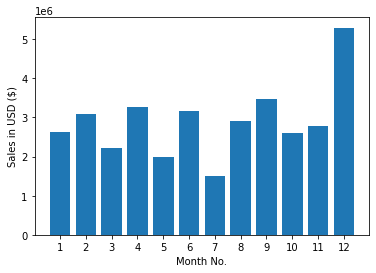

In [20]:
months = range(1, 12+1)

plt.bar(months, results['Sales'])
# plt.show()

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel("Month No.")
plt.show()

### Question 2: _What city had the highest number of sales_ ?


In [21]:
results = all_data.groupby('City').sum()
print(results)

                     Quantity Ordered  Price Each   Month       Sales
City                                                                 
 Atlanta (GA)                   16808  2800960.07  104180  2815694.73
 Austin (TX)                    10954  1871179.66   67985  1882927.69
 Boston (MA)                    22277  3647559.02  139260  3669114.02
 Dallas (TX)                    16738  2845748.15  104202  2863050.80
 Los Angeles (CA)               33454  5521879.44  206889  5552116.52
 New York City (NY)             28138  4643904.98  173946  4676427.00
 Portland (ME)                   2884   457639.82   17380   460909.75
 Portland (OR)                  11320  1858818.49   69949  1871141.67
 San Francisco (CA)             50443  8325635.73  312549  8374687.47
 Seattle (WA)                   16836  2767947.75  103359  2785366.10


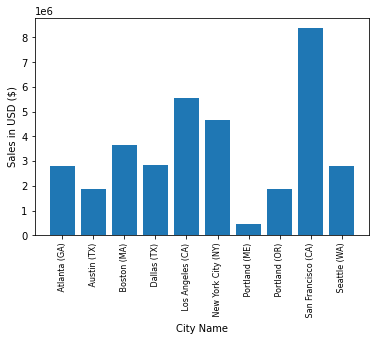

In [22]:
# cities = all_data['City'].unique()
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
# plt.show()

plt.xticks(cities, rotation='vertical', size=8 )
plt.ylabel('Sales in USD ($)')
plt.xlabel("City Name")
plt.show()

### Question 3: _What time should we display advertisemensts to maximize likelihood of customer's buying products_?

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,182073,Google Phone,1,600.00,04/30/19 10:35,"608 Hill St, New York City, NY 10001",4,600.00,New York City (NY)
1,182074,AA Batteries (4-pack),1,3.84,04/04/19 16:50,"990 14th St, Boston, MA 02215",4,3.84,Boston (MA)
2,182075,iPhone,1,700.00,04/13/19 18:55,"669 12th St, Seattle, WA 98101",4,700.00,Seattle (WA)
3,182076,Google Phone,1,600.00,04/12/19 19:02,"939 Highland St, Austin, TX 73301",4,600.00,Austin (TX)
4,182077,USB-C Charging Cable,1,11.95,04/06/19 01:20,"856 Spruce St, San Francisco, CA 94016",4,11.95,San Francisco (CA)


In [24]:
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,182073,Google Phone,1,600.00,2019-04-30 10:35:00,"608 Hill St, New York City, NY 10001",4,600.00,New York City (NY)
1,182074,AA Batteries (4-pack),1,3.84,2019-04-04 16:50:00,"990 14th St, Boston, MA 02215",4,3.84,Boston (MA)
2,182075,iPhone,1,700.00,2019-04-13 18:55:00,"669 12th St, Seattle, WA 98101",4,700.00,Seattle (WA)
3,182076,Google Phone,1,600.00,2019-04-12 19:02:00,"939 Highland St, Austin, TX 73301",4,600.00,Austin (TX)
4,182077,USB-C Charging Cable,1,11.95,2019-04-06 01:20:00,"856 Spruce St, San Francisco, CA 94016",4,11.95,San Francisco (CA)


In [26]:
all_data["Hour"] = all_data['Order Date'].dt.hour
all_data["Minute"] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,182073,Google Phone,1,600.00,2019-04-30 10:35:00,"608 Hill St, New York City, NY 10001",4,600.00,New York City (NY),10,35
1,182074,AA Batteries (4-pack),1,3.84,2019-04-04 16:50:00,"990 14th St, Boston, MA 02215",4,3.84,Boston (MA),16,50
2,182075,iPhone,1,700.00,2019-04-13 18:55:00,"669 12th St, Seattle, WA 98101",4,700.00,Seattle (WA),18,55
3,182076,Google Phone,1,600.00,2019-04-12 19:02:00,"939 Highland St, Austin, TX 73301",4,600.00,Austin (TX),19,2
4,182077,USB-C Charging Cable,1,11.95,2019-04-06 01:20:00,"856 Spruce St, San Francisco, CA 94016",4,11.95,San Francisco (CA),1,20


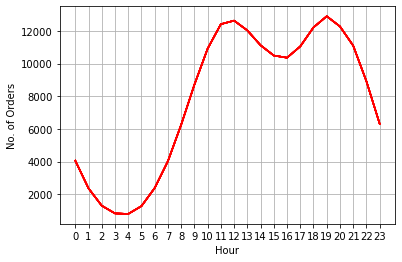

In [65]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(), color='r')

# all_data.groupby(['Hour']).count()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

### Question 4: _What products are most often sold together_ ?

In [30]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
12,182085,AA Batteries (4-pack),2,3.84,2019-04-25 06:29:00,"669 Spruce St, Portland, OR 97035",4,7.68,Portland (OR),6,29
13,182085,ThinkPad Laptop,1,999.99,2019-04-25 06:29:00,"669 Spruce St, Portland, OR 97035",4,999.99,Portland (OR),6,29
31,182103,Apple Airpods Headphones,1,150.00,2019-04-21 21:05:00,"785 14th St, Portland, OR 97035",4,150.00,Portland (OR),21,5
32,182103,USB-C Charging Cable,1,11.95,2019-04-21 21:05:00,"785 14th St, Portland, OR 97035",4,11.95,Portland (OR),21,5
38,182109,Wired Headphones,1,11.99,2019-04-04 17:50:00,"47 West St, San Francisco, CA 94016",4,11.99,San Francisco (CA),17,50


In [33]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head(100)

C:\Users\ANURAG\AppData\Local\Temp/ipykernel_3492/1744674195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
12,182085,"AA Batteries (4-pack),ThinkPad Laptop"
31,182103,"Apple Airpods Headphones,USB-C Charging Cable"
38,182109,"Wired Headphones,AAA Batteries (4-pack)"
50,182120,"AAA Batteries (4-pack),Lightning Charging Cable"
61,182130,"AA Batteries (4-pack),AA Batteries (4-pack)"
...,...,...
2869,184834,"iPhone,Wired Headphones"
2876,184840,"Vareebadd Phone,Bose SoundSport Headphones"
2917,184880,"iPhone,Lightning Charging Cable,Apple Airpods ..."
2921,184882,"Google Phone,USB-C Charging Cable"


In [45]:
count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1017
('Google Phone', 'USB-C Charging Cable') 988
('iPhone', 'Wired Headphones') 509
('Google Phone', 'Wired Headphones') 387
('Vareebadd Phone', 'USB-C Charging Cable') 333
('iPhone', 'Apple Airpods Headphones') 319
('Google Phone', 'Bose SoundSport Headphones') 197
('Vareebadd Phone', 'Wired Headphones') 150
('USB-C Charging Cable', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 117


### Question 5: _What product is sold the most? Why do you think it's sold the most_?

In [46]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,182073,Google Phone,1,600.00,2019-04-30 10:35:00,"608 Hill St, New York City, NY 10001",4,600.00,New York City (NY),10,35
1,182074,AA Batteries (4-pack),1,3.84,2019-04-04 16:50:00,"990 14th St, Boston, MA 02215",4,3.84,Boston (MA),16,50
2,182075,iPhone,1,700.00,2019-04-13 18:55:00,"669 12th St, Seattle, WA 98101",4,700.00,Seattle (WA),18,55
3,182076,Google Phone,1,600.00,2019-04-12 19:02:00,"939 Highland St, Austin, TX 73301",4,600.00,Austin (TX),19,2
4,182077,USB-C Charging Cable,1,11.95,2019-04-06 01:20:00,"856 Spruce St, San Francisco, CA 94016",4,11.95,San Francisco (CA),1,20


In [48]:
product_group = all_data.groupby("Product")

product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4170,454698.66,29055,458658.30,59011,122603
27in 4K Gaming Monitor,6352,2469806.67,44284,2477216.48,92033,187651
27in FHD Monitor,7675,1144723.68,53044,1151173.25,109588,227588
34in Ultrawide Monitor,6259,2374937.50,43768,2378357.41,89653,186371
AA Batteries (4-pack),27452,78236.16,142299,105415.68,294326,597863
AAA Batteries (4-pack),31077,61976.72,144327,92920.23,299361,609142
Apple Airpods Headphones,15576,2321250.00,107425,2336400.00,223555,450781
Bose SoundSport Headphones,13471,1332266.76,92341,1346965.29,192777,391621
Flatscreen TV,4819,1442400.00,33654,1445700.00,69680,142869


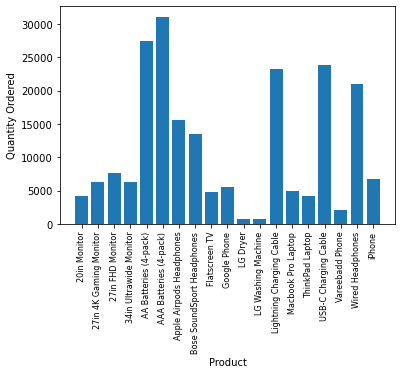

In [55]:
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [56]:
prices = all_data.groupby('Product').mean()["Price Each"]

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\ANURAG\AppData\Local\Temp/ipykernel_3492/2752864025.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices, 'b-', color = 'r')
C:\Users\ANURAG\AppData\Local\Temp/ipykernel_3492/2752864025.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


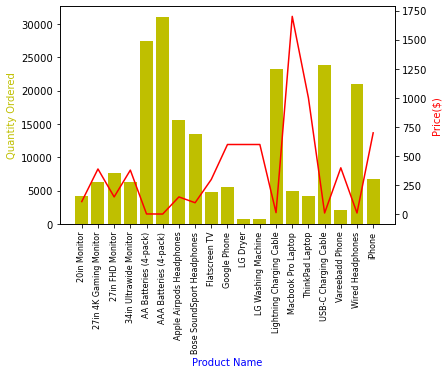

In [66]:
flg, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='y')
ax2.plot(products, prices, 'b-', color = 'r')

ax1.set_xlabel("Product Name", color='b')
ax1.set_ylabel('Quantity Ordered', color ='y')
ax2.set_ylabel('Price($)', color ='r')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()